In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO


In [7]:


# Fetch the data
url = "https://www.daggegevens.knmi.nl/klimatologie/uurgegevens"
params = {"stns": "370", "vars": "", "start": "20200101", "end": "20250101"}
response = requests.get(url, params=params)

# Ensure the request was successful
if response.status_code == 200:
    # Get the content and decode it
    content = response.content.decode('utf-8')
    print(content)
    # Split content into lines
    lines = content.split('\n')
    
    # Identify the last comment line
    last_comment_line = None
    for line in lines:
        if line.startswith('#'):
            last_comment_line = line.lstrip('#').strip()
    
    # Filter out all comment lines except for the last one
    data_lines = [line for line in lines if not line.startswith('#')]
    
    # If there's a last comment line, add it to the beginning of the data
    if last_comment_line:
        data_lines.insert(0, last_comment_line)
    
    # Join the data lines back into a single string
    data_str = "\n".join(data_lines)
    
    # Write the cleaned data to a file
    with open('knmi_data_uur.csv', 'w') as file:
        file.write(data_str)
    
    # Read the cleaned data into a DataFrame
    df = pd.read_csv(StringIO(data_str), sep=',')
    
    # Display the first few rows of the DataFrame
    print(df.head())
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")
df


# Opmerking: door stationsverplaatsingen en veranderingen in waarneemmethodieken zijn deze tijdreeksen van uurwaarden mogelijk inhomogeen! Dat betekent dat deze reeks van gemeten waarden niet geschikt is voor trendanalyse. Voor studies naar klimaatverandering verwijzen we naar de gehomogeniseerde dagreeksen <http://www.knmi.nl/nederland-nu/klimatologie/daggegevens> of de Centraal Nederland Temperatuur <http://www.knmi.nl/kennis-en-datacentrum/achtergrond/centraal-nederland-temperatuur-cnt>.
# 
# SOURCE: ROYAL NETHERLANDS METEOROLOGICAL INSTITUTE (KNMI)
# Comment: These time series are inhomogeneous because of station relocations and changes in observation techniques. As a result these series are not suitable for trend analysis. For climate change studies we refer to the homogenized series of daily data <http://www.knmi.nl/nederland-nu/klimatologie/daggegevens> or the Central Netherlands Temperature <http://www.knmi.nl/kennis-en-datacentrum/achtergrond/centraal-nederland-temperatuur-cnt

STN  YYYYMMDD     HH     DD     FH     FF     FX      T   T10N     TD  \
0      370  20200101      1    140     30     30     60     31            20   
1      370  20200101      2    120     20     20     40     29            18   
2      370  20200101      3    110     20     20     50     25            15   
3      370  20200101      4    130     30     10     50     22            16   
4      370  20200101      5    150     20     30     50     20            12   
...    ...       ...    ...    ...    ...    ...    ...    ...    ...    ...   
43795  370  20241229     20    210     50     40     70     31            30   
43796  370  20241229     21    220     40     50     70     34            32   
43797  370  20241229     22    210     50     50     80     34            32   
43798  370  20241229     23    210     60     60     90     32            31   
43799  370  20241229     24    200     50     50     80     31     30     30   

       ...      U     WW     IX      M      R      S     O      Y    HH.1  \
0      ...     92     10      7      0      0      0     0      0     NaN   
1      ...     92     10      7      0      0      0     0      0     NaN   
2      ...     93     10      7      0      0      0     0      0     NaN   
3      ...     95     10      7      0      0      0     0      0     NaN   
4      ...     94     10      7      0      0      0     0      0     NaN   
...    ...    ...    ...    ...    ...    ...    ...   ...    ...     ...   
43795  ...     99     10      7      0      0      0     0      0     NaN   
43796  ...     99     10      7      0      0      0     0      0     NaN   
43797  ...     99     10      7      0      0      0     0      0     NaN   
43798  ...     99     10      7      0      0      0     0      0     NaN   
43799  ...     99     10      7      0      0      0     0      0     NaN   

       YYYYMMDD.1  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
43795         NaN  
43796         NaN  
43797         NaN  
43798         NaN  
43799         NaN  

[43800 rows x 27 columns]

In [4]:
df
df['YYYYMMDD'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')
# Set 'YYYYMMDD' column as the index
df.set_index('YYYYMMDD', inplace=True)
df

STN     HH     DD     FH     FF     FX      T   T10N     TD  \
YYYYMMDD                                                                  
2020-01-01  370      1    140     30     30     60     31            20   
2020-01-01  370      2    120     20     20     40     29            18   
2020-01-01  370      3    110     20     20     50     25            15   
2020-01-01  370      4    130     30     10     50     22            16   
2020-01-01  370      5    150     20     30     50     20            12   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
2024-12-28  370     20    170     10     10     20     -7            -8   
2024-12-28  370     21    200     10     10     20     -8            -9   
2024-12-28  370     22    220     10     20     20    -10           -12   
2024-12-28  370     23    210     20     20     30     -2            -3   
2024-12-28  370     24    220     20     30     40      6     -9      5   

               SQ  ...      U     WW     IX      M      R     S      O     Y  \
YYYYMMDD           ...                                                         
2020-01-01      0  ...     92     10      7      0      0     0      0     0   
2020-01-01      0  ...     92     10      7      0      0     0      0     0   
2020-01-01      0  ...     93     10      7      0      0     0      0     0   
2020-01-01      0  ...     95     10      7      0      0     0      0     0   
2020-01-01      0  ...     94     10      7      0      0     0      0     0   
...           ...  ...    ...    ...    ...    ...    ...   ...    ...   ...   
2024-12-28      0  ...     99     35      7      1      0     0      0     1   
2024-12-28      0  ...     98     35      7      1      0     0      0     1   
2024-12-28      0  ...     98     35      7      1      0     0      0     1   
2024-12-28      0  ...     99     35      7      1      0     0      0     1   
2024-12-28      0  ...     99     33      7      1      0     0      0     1   

               HH.1  YYYYMMDD.1  
YYYYMMDD                         
2020-01-01      NaN         NaN  
2020-01-01      NaN         NaN  
2020-01-01      NaN         NaN  
2020-01-01      NaN         NaN  
2020-01-01      NaN         NaN  
...             ...         ...  
2024-12-28      NaN         NaN  
2024-12-28      NaN         NaN  
2024-12-28      NaN         NaN  
2024-12-28      NaN         NaN  
2024-12-28      NaN         NaN  

[43776 rows x 26 columns]

In [5]:
# import requests

# # Fetch the data
# url = "https://www.daggegevens.knmi.nl/klimatologie/daggegevens"
# params = {"stns": "370", "vars": "", "start": "19200101", "end": "20240520"}
# response = requests.get(url, params=params)

# # Ensure the request was successful
# if response.status_code == 200:
#     # Get the content and decode it
#     content = response.content.decode('utf-8')
    
#     # Split content into lines and filter out comment lines
#     lines = content.split('\n')
#     data_lines = [line for line in lines]
    
#     # Join the data lines back into a single string
#     data_str = "\n".join(data_lines)
    
#     # Write the cleaned data to a file
#     with open('knmi_data-comments.csv', 'w') as file:
#         file.write(data_str)
    
#     print("Data has been written to knmi_data.csv")
# else:
#     print(f"Failed to fetch data. Status code: {response.status_code}")


In [6]:
import requests
import pandas as pd
from io import StringIO

# Fetch the data
url = "https://www.daggegevens.knmi.nl/klimatologie/daggegevens"
params = {"stns": "370", "vars": "", "start": "19200101", "end": "20250101"}
response = requests.get(url, params=params)

# Ensure the request was successful
if response.status_code == 200:
    # Get the content and decode it
    content = response.content.decode('utf-8')
    
    # Split content into lines
    lines = content.split('\n')
    
    # Identify the last comment line
    last_comment_line = None
    for line in lines:
        if line.startswith('#'):
            last_comment_line = line.lstrip('#').strip()
    
    # Filter out all comment lines except for the last one
    data_lines = [line for line in lines if not line.startswith('#')]
    
    # If there's a last comment line, add it to the beginning of the data
    if last_comment_line:
        data_lines.insert(0, last_comment_line)
    
    # Join the data lines back into a single string
    data_str = "\n".join(data_lines)
    
    # Write the cleaned data to a file
    with open('knmi_data.csv', 'w') as file:
        file.write(data_str)
    
    # Read the cleaned data into a DataFrame
    df = pd.read_csv(StringIO(data_str), sep=',')

    # Rename columns to understandable but short names
    df.columns = [
        "Station", "Date", "WindDirVec", "WindSpeedVec", "WindSpeedAvg", 
        "WindSpeedMaxHr", "WindSpeedMaxHrHr", "WindSpeedMinHr", "WindSpeedMinHrHr",
        "WindGustMax", "WindGustMaxHr", "TempAvg", "TempMin", "TempMinHr", 
        "TempMax", "TempMaxHr", "TempMin10cm", "TempMin10cmHr", "SunshineDur", 
        "SunshinePerc", "RadiationGlob", "PrecipDur", "PrecipAmount", 
        "PrecipMaxHr", "PrecipMaxHrHr", "PressureAvg", "PressureMax", 
        "PressureMaxHr", "PressureMin", "PressureMinHr", "VisibilityMin", 
        "VisibilityMinHr", "VisibilityMax", "VisibilityMaxHr", "CloudCoverAvg", 
        "HumidityAvg", "HumidityMax", "HumidityMaxHr", "HumidityMin", 
        "HumidityMinHr", "Evapotransp"
    ]

    # Convert data types
    df["Date"] = pd.to_datetime(df["Date"], format='%Y%m%d')
    df.set_index("Date", inplace=True)
    numeric_cols = df.columns.drop(["Station"])
    df[numeric_cols] = df[numeric_cols].    apply(pd.to_numeric, errors='coerce')

    # Display the first few rows of the DataFrame
    print(df.head())
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")


C:\Users\imme.rutgers\AppData\Local\Temp\ipykernel_22844\2927433313.py:39: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(StringIO(data_str), sep=',')


            Station  WindDirVec  WindSpeedVec  WindSpeedAvg  WindSpeedMaxHr  \
Date                                                                          
1951-01-01      370       180.0          93.0          93.0           123.0   
1951-01-02      370       144.0          41.0          46.0            82.0   
1951-01-03      370       216.0          26.0          26.0            82.0   
1951-01-04      370       194.0          82.0          87.0           123.0   
1951-01-05      370       203.0          82.0          87.0           123.0   

            WindSpeedMaxHrHr  WindSpeedMinHr  WindSpeedMinHrHr  WindGustMax  \
Date                                                                          
1951-01-01              17.0            72.0               5.0          NaN   
1951-01-02               1.0            21.0              22.0          NaN   
1951-01-03              24.0             0.0               1.0          NaN   
1951-01-04              13.0            51.0       

In [7]:
df.head()

Station  WindDirVec  WindSpeedVec  WindSpeedAvg  WindSpeedMaxHr  \
Date                                                                          
1951-01-01      370       180.0          93.0          93.0           123.0   
1951-01-02      370       144.0          41.0          46.0            82.0   
1951-01-03      370       216.0          26.0          26.0            82.0   
1951-01-04      370       194.0          82.0          87.0           123.0   
1951-01-05      370       203.0          82.0          87.0           123.0   

            WindSpeedMaxHrHr  WindSpeedMinHr  WindSpeedMinHrHr  WindGustMax  \
Date                                                                          
1951-01-01              17.0            72.0               5.0          NaN   
1951-01-02               1.0            21.0              22.0          NaN   
1951-01-03              24.0             0.0               1.0          NaN   
1951-01-04              13.0            51.0               3.0          NaN   
1951-01-05              18.0            41.0               3.0          NaN   

            WindGustMaxHr  ...  VisibilityMinHr  VisibilityMax  \
Date                       ...                                   
1951-01-01            NaN  ...              NaN            NaN   
1951-01-02            NaN  ...              NaN            NaN   
1951-01-03            NaN  ...              NaN            NaN   
1951-01-04            NaN  ...              NaN            NaN   
1951-01-05            NaN  ...              NaN            NaN   

            VisibilityMaxHr  CloudCoverAvg  HumidityAvg  HumidityMax  \
Date                                                                   
1951-01-01              NaN            5.0          NaN          NaN   
1951-01-02              NaN            7.0          NaN          NaN   
1951-01-03              NaN            8.0          NaN          NaN   
1951-01-04              NaN            6.0          NaN          NaN   
1951-01-05              NaN            8.0          NaN          NaN   

            HumidityMaxHr  HumidityMin  HumidityMinHr  Evapotransp  
Date                                                                
1951-01-01            NaN          NaN            NaN          NaN  
1951-01-02            NaN          NaN            NaN          NaN  
1951-01-03            NaN          NaN            NaN          NaN  
1951-01-04            NaN          NaN            NaN          NaN  
1951-01-05            NaN          NaN            NaN          NaN  

[5 rows x 40 columns]

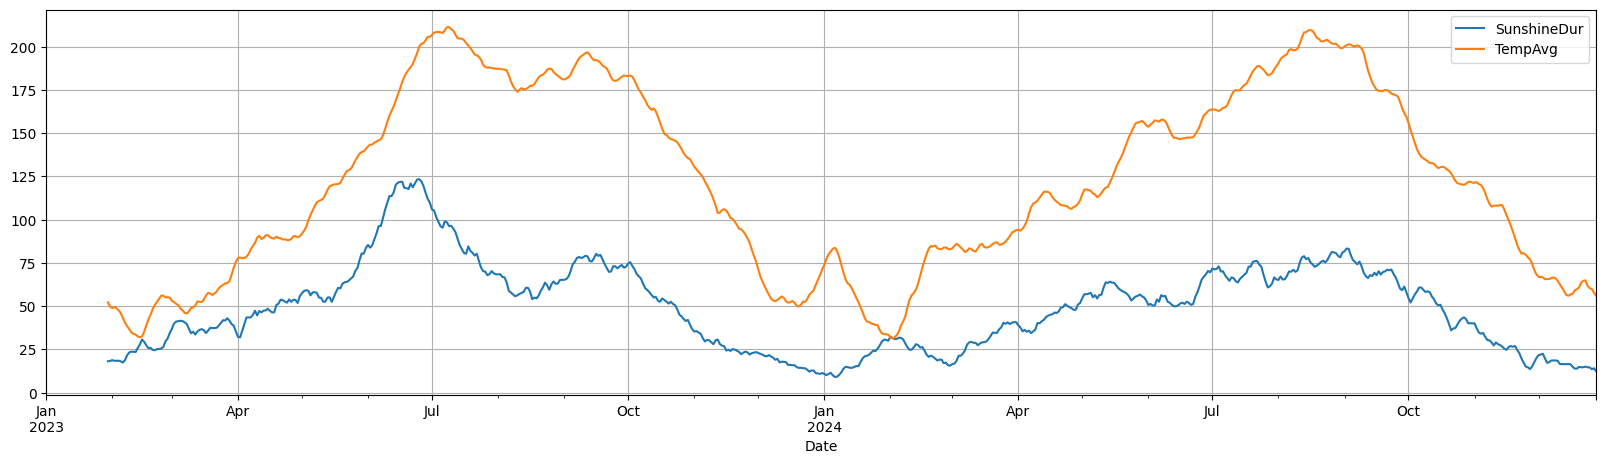

In [8]:
fig, ax = plt.subplots(figsize=(20, 5))
# Calculate rolling mean and plot
df.loc['2023':, ['SunshineDur', 'TempAvg']].rolling(30).mean().plot(ax=ax)
ax.grid(True)
# Display the plot
plt.show()


In [9]:
df.columns

Index(['Station', 'WindDirVec', 'WindSpeedVec', 'WindSpeedAvg',
       'WindSpeedMaxHr', 'WindSpeedMaxHrHr', 'WindSpeedMinHr',
       'WindSpeedMinHrHr', 'WindGustMax', 'WindGustMaxHr', 'TempAvg',
       'TempMin', 'TempMinHr', 'TempMax', 'TempMaxHr', 'TempMin10cm',
       'TempMin10cmHr', 'SunshineDur', 'SunshinePerc', 'RadiationGlob',
       'PrecipDur', 'PrecipAmount', 'PrecipMaxHr', 'PrecipMaxHrHr',
       'PressureAvg', 'PressureMax', 'PressureMaxHr', 'PressureMin',
       'PressureMinHr', 'VisibilityMin', 'VisibilityMinHr', 'VisibilityMax',
       'VisibilityMaxHr', 'CloudCoverAvg', 'HumidityAvg', 'HumidityMax',
       'HumidityMaxHr', 'HumidityMin', 'HumidityMinHr', 'Evapotransp'],
      dtype='object')

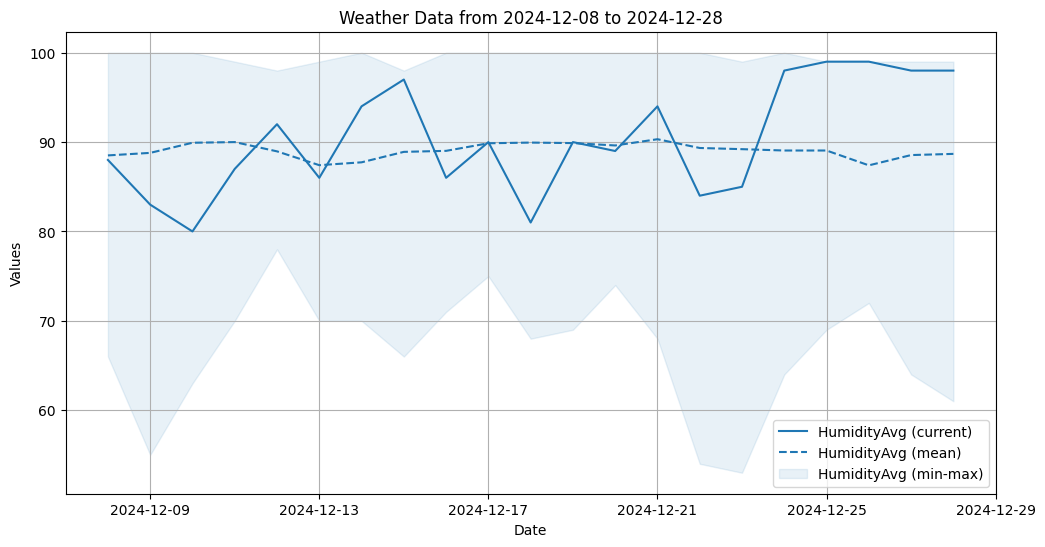

In [10]:
def plot_weather_data(df, attributes, end_date=None, days=7, DateRangeStart=None):
    # Default end_date to the last date in the dataset if not provided
    if end_date is None:
        end_date = df.index.max()
    if DateRangeStart is not None:
        df = df.loc[DateRangeStart:]

    # Ensure end_date is in datetime format
    end_date = pd.to_datetime(end_date)

    # Define start date as 7 days before end_date
    start_date = end_date - pd.Timedelta(days=days)

    # Filter data for the target period
    target_period = df.loc[start_date:end_date, attributes]

    # Calculate statistics (mean, min, max) for each day of the year excluding the target year
    df_excluding_target = df[~(df.index.year == end_date.year)]
    stats = df_excluding_target.groupby(df_excluding_target.index.dayofyear)[attributes].agg(['mean', 'min', 'max'])

    # Plot data
    plt.figure(figsize=(12, 6))
    colors = plt.cm.tab10.colors  # Use consistent colors
    for i, attr in enumerate(attributes):
        color = colors[i % len(colors)]
        plt.plot(target_period.index, target_period[attr], label=f'{attr} (current)', color=color)

        # Get day-of-year indices for the target period
        doy_indices = target_period.index.dayofyear
        plt.plot(target_period.index, stats[(attr, 'mean')].loc[doy_indices].values, 
                 label=f'{attr} (mean)', linestyle='--', color=color)
        plt.fill_between(target_period.index,
                         stats[(attr, 'min')].loc[doy_indices].values,
                         stats[(attr, 'max')].loc[doy_indices].values,
                         alpha=0.1, color=color, label=f'{attr} (min-max)')

    plt.legend()
    plt.grid(True)
    plt.title(f'Weather Data from {start_date.date()} to {end_date.date()}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.show()

plot_weather_data(df, ["HumidityAvg"], days=20, DateRangeStart="1950")

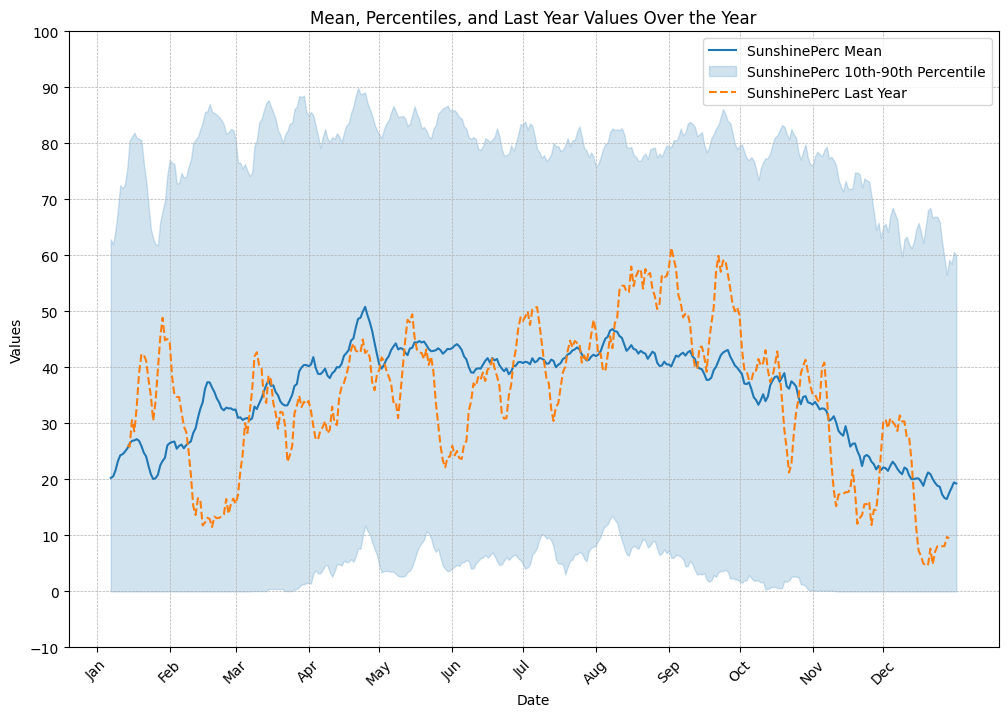

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for linspace

# Function to plot mean, percentiles, and actual values for the last year
def plot_yearly_stats(df, columns):
    """
    Plots the mean, 10th/90th percentiles, and actual values for the last year of given columns 
    for each day of the year, averaged over all years in the dataset.

    Parameters:
    df (pd.DataFrame): DataFrame with a datetime index.
    columns (list): List of column names to analyze.
    """
    # Ensure the index is datetime and filter from 1980 onwards
    df = df.copy().loc['1980-01-01':]
    df.index = pd.to_datetime(df.index)

    # Extract month and day
    df['Month'] = df.index.month
    df['Day'] = df.index.day

    # Create datetime labels for x-axis
    dates = pd.date_range(start='2023-01-01', periods=366)

    # Plotting
    plt.figure(figsize=(12, 8))

    # Colors for each column
    colors = plt.cm.tab10.colors

    for i, column in enumerate(columns):
        # Group by month and day
        grouped = df.groupby(['Month', 'Day'])[column]

        # Calculate statistics, handling missing values
        mean = grouped.mean().rolling(7).mean()
        p10 = grouped.quantile(0.10).rolling(7).mean()
        p90 = grouped.quantile(0.90).rolling(7).mean()

        # Plot mean and percentiles
        plt.plot(dates[:len(mean)], mean, label=f'{column} Mean', color=colors[i % len(colors)])
        plt.fill_between(dates[:len(mean)], p10, p90, color=colors[i % len(colors)], alpha=0.2, label=f'{column} 10th-90th Percentile')

        # Add actual values for the last year
        last_year = df[df.index.year == df.index.year.max()].rolling(14).mean()  # Filter the last year in the data
        plt.plot(dates[:len(last_year)], last_year[column].values, label=f'{column} Last Year', 
                 color=colors[(i + 1) % len(colors)], linestyle='--')

    # Set gridlines and ticks
    plt.title('Mean, Percentiles, and Last Year Values Over the Year')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Add more ticks for months and days
    plt.xticks(pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS'), 
               labels=[d.strftime('%b') for d in pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS')], rotation=45)

    # Manually set y-ticks to increment by 10, centered around 0
    y_min, y_max = plt.gca().get_ylim()  # Get the current y-axis limits
    y_min = (np.floor(y_min / 10) * 10)  # Round down to the nearest 10
    y_max = (np.ceil(y_max / 10) * 10)   # Round up to the nearest 10
    y_ticks = np.arange(y_min, y_max + 10, 10)  # Generate ticks in increments of 10
    plt.yticks(y_ticks)

    # Show the plot
    plt.show()

# Example Usage
# Assuming 'df' is your DataFrame with the described columns
plot_yearly_stats(df, ['SunshinePerc'])


In [12]:
df.columns

Index(['Station', 'WindDirVec', 'WindSpeedVec', 'WindSpeedAvg',
       'WindSpeedMaxHr', 'WindSpeedMaxHrHr', 'WindSpeedMinHr',
       'WindSpeedMinHrHr', 'WindGustMax', 'WindGustMaxHr', 'TempAvg',
       'TempMin', 'TempMinHr', 'TempMax', 'TempMaxHr', 'TempMin10cm',
       'TempMin10cmHr', 'SunshineDur', 'SunshinePerc', 'RadiationGlob',
       'PrecipDur', 'PrecipAmount', 'PrecipMaxHr', 'PrecipMaxHrHr',
       'PressureAvg', 'PressureMax', 'PressureMaxHr', 'PressureMin',
       'PressureMinHr', 'VisibilityMin', 'VisibilityMinHr', 'VisibilityMax',
       'VisibilityMaxHr', 'CloudCoverAvg', 'HumidityAvg', 'HumidityMax',
       'HumidityMaxHr', 'HumidityMin', 'HumidityMinHr', 'Evapotransp'],
      dtype='object')